In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [2]:
import tensorflow as tf

2024-06-06 21:48:11.845980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 21:48:11.846193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 21:48:12.025006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_train_path ="/kaggle/input/fruit-and-vegetable-image-recognition/train"
data_test_path="/kaggle/input/fruit-and-vegetable-image-recognition/test"
data_val_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"


In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
data_train_path,
    shuffle= True,
    image_size= (img_width, img_height),
    batch_size = 32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names
#data_cat

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 359 files belonging to 36 classes.


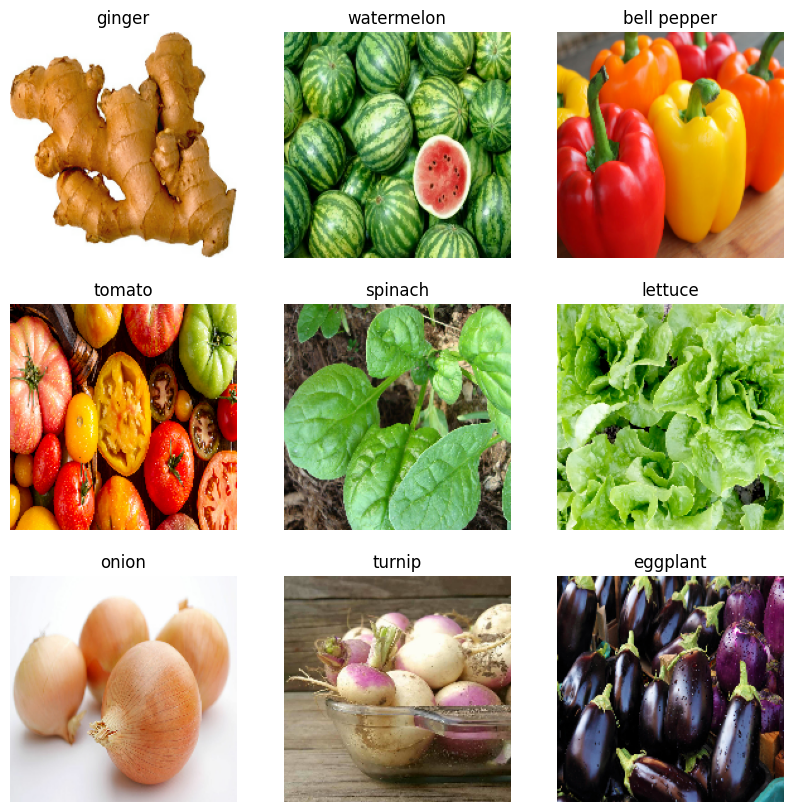

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [13]:
from tensorflow.keras.layers import Rescaling

# Define the rescaling layer
rescaling = Rescaling(1./255)

# Define the Sequential model
model = Sequential([
    rescaling,  # Rescaling layer
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),
    Dense(128),
    Dense(len(data_cat)),
])


In [14]:
    model.compile(optimizer='adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [15]:
epochs =25
history = model.fit(data_train, validation_data=data_val,epochs=epochs,batch_size=32,verbose=1 )

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 803ms/step - accuracy: 0.0627 - loss: 3.6813 - val_accuracy: 0.3590 - val_loss: 2.3920
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 787ms/step - accuracy: 0.2634 - loss: 2.6351 - val_accuracy: 0.5556 - val_loss: 1.6936
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 787ms/step - accuracy: 0.4246 - loss: 2.0574 - val_accuracy: 0.6838 - val_loss: 1.1916
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 800ms/step - accuracy: 0.5572 - loss: 1.5349 - val_accuracy: 0.8689 - val_loss: 0.6539
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 792ms/step - accuracy: 0.7173 - loss: 1.0348 - val_accuracy: 0.8832 - val_loss: 0.5567
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 792ms/step - accuracy: 0.7960 - loss: 0.7261 - val_accuracy: 0.9060 - val_loss: 0.4663
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 788ms/step - accuracy: 0.8850 - loss: 0.4300 - val_accuracy: 0.9202 - val_loss: 0.4661
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 793ms/step - accuracy: 0.9347 - loss: 0.2948 - val_accu

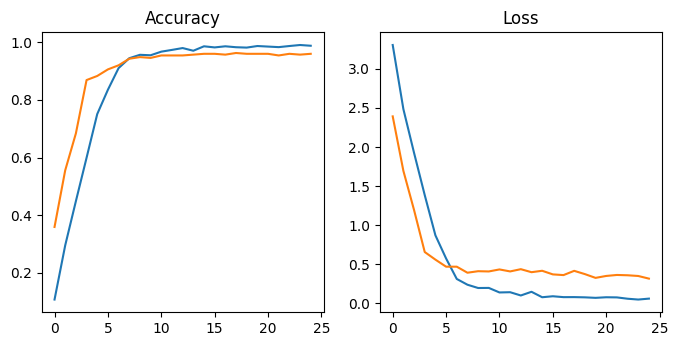

In [16]:
epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range , history.history['val_accuracy'],label ='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range , history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

plt.show()

In [17]:
#image 'Enter your fruit image to classify'
#image= tf.keras.utils.load_img(image, target_size=(img_width, img_height))
#img_arr = tf.keras.utils.array_to_img(image)
#img_bat = tf.expand_dims(img_arr, 0)

In [18]:
#predict = model.predict(img_bat)

In [19]:
#score= tf.nn.softmax(predict)

In [20]:
#print('Veg / Fruit in Image is {}  with accuracy of {0.2f}'.format(data_cat[np.argmax(score),np.max(score)*100]) )